In [1]:
#Importamos las bibliotecas a utilizar
#para conectarnos a la URL, scrapear, usar pandas y realizar gráficos básicos
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
#Crea una lista vacía que servirá para juntar los datos como tìtulos, autor, año , etc
lista=[]
#Conexión con la URL
html = urllib.request.urlopen("https://tesis.pucp.edu.pe/repositorio/discover")
#Creación de sopa para mejor scrapeo ya que lo ordena de una mejor manera
soup = BeautifulSoup(html, 'html.parser')
#Se selecciona de la página web, la cantidad de tesis total
max= int(str(soup.find("p", class_="pagination-info").text)[26:31])
#Crea una lista "cuantos" para que de forma interactiva, pueda extraer una proporción o totalidad del repositorio
cuantos=[max, max//2 ,max//3 , max//4]
#Se le hace saber al ejecutador que significa los numeros "1,2,3,4" para que pueda extraer el repositorio relacionado a la proporción
print("se define")
print("1:totalidad, 2:Mitad, 3:Tercera, 4:Cuarta, parte de la cantida de tesis para el repositorio")
rango= int(input("Escriba el numero por favor:"))
#Una vez escogido el nùmero, se procede a escoger de la lista "cuantos" cuánto será la proporción escogida a scrapear
if rango ==1:
      rango= cuantos[0]
if rango ==2:
      rango= cuantos[1]
if rango ==3:
      rango=cuantos[2]
if rango ==4:
      rango=cuantos[3]
#Creamos un loop para que podamos scrapear para cada página particular del repositorio
for m in range(rango):
    #Try indica que intentará scrapear si es que existe esa pàgina, caso contrario que continue buscando
    try :
        #Conectará la pagina que empieza desde el repositorio 0 hasta el repositorio máximo encontrado usando formart
        html = urllib.request.urlopen("https://tesis.pucp.edu.pe/repositorio/handle/20.500.12404/{}?show=full".format(m)).read()
        soup = BeautifulSoup(html, 'html.parser')
        #Creamos dos tablas que guardaran las descripciones de la tesis en particular
        tabla1= soup.find_all("tr", class_="ds-table-row odd")
        tabla2= soup.find_all("tr", class_="ds-table-row even")
        #Condicionamos que sino existe tal tabla entonces continue
        if len(tabla1) !=0:
            #Crear un loop para buscar cada atributo en particular
            #Se desea guardar cada atributo para luego respetar un orden que se quiera mostrar, como en cada repositorio la tabla
            #no siempre es el mismo orden, entonces si cumple la condición del texto deseado que guarde, caso contrario, continua
            for n in range(len(tabla1)):
                if str(tabla1[n].find().text) == "dc.publisher":
                    a1=(tabla1[n].find("td", class_="word-break").text)
                if str(tabla1[n].find().text) == "dc.title":
                    a2=(tabla1[n].find("td", class_="word-break").text)
                if str(tabla1[n].find().text) == "dc.contributor.author":
                    a3=(tabla1[n].find("td", class_="word-break").text)
                if str(tabla1[n].find().text) == "thesis.degree.level" :
                    a4=(tabla1[n].find("td", class_="word-break").text)       
                if str(tabla1[n].find().text) == "dc.contributor.advisor" :
                    a5=(tabla1[n].find("td", class_="word-break").text)        
                if str(tabla1[n].find().text) == "dc.description.abstract" :
                    a6=(tabla1[n].find("td", class_="word-break").text)       
                if str(tabla1[n].find().text) == "dc.date.created" :
                    a7=(tabla1[n].find("td", class_="word-break").text) 
                if str(tabla1[n].find().text) == "thesis.degree.discipline" :
                    a8=str(tabla1[n].find("td", class_="word-break").text)

                else:
                    continue     
            for n in range(len(tabla2)):
                if str(tabla2[n].find().text) == "dc.publisher" :
                    a1=(tabla2[n].find("td", class_="word-break").text)        
                if str(tabla2[n].find().text) == "dc.title" :
                    a2=(tabla2[n].find("td", class_="word-break").text)        
                if str(tabla2[n].find().text) == "dc.contributor.author" :
                    a3=(tabla2[n].find("td", class_="word-break").text)       
                if str(tabla2[n].find().text) == "thesis.degree.level" :
                    a4=(tabla2[n].find("td", class_="word-break").text)       
                if str(tabla2[n].find().text) == "dc.contributor.advisor" :
                    a5=(tabla2[n].find("td", class_="word-break").text)        
                if str(tabla2[n].find().text) == "dc.description.abstract" :
                    a6=(tabla2[n].find("td", class_="word-break").text)     
                if str(tabla2[n].find().text) == "dc.date.created" :
                    a7=(tabla2[n].find("td", class_="word-break").text)
                if str(tabla2[n].find().text) == "thesis.degree.discipline" :
                    a8=str(tabla2[n].find("td", class_="word-break").text)
                else:
                    continue
            #Una vez obtenido todos los atributos para cada tesis, guarde en la lista vacía "lista"
            lista.append([a1,a2,a3,a4,a5,a6,a7,a8])            
        else:
            continue
    except:
        continue

se define
1:totalidad, 2:Mitad, 3:Tercera, 4:Cuarta, parte de la cantida de tesis para el repositorio
Escriba el numero por favor:1


In [3]:
#Transformamos la lista en data frame
df=pd.DataFrame(lista)
#Creamos las cabeceras para el nuevo DataFrame
df.columns=["Universidad","Título","Tesista","Grado","Asesor","Resumen","Año","Disciplina"]
#Filtramos el data frame para los 2 casos de : Disciplina estadìstica y las relacionadas a ella
df2=df[df.Disciplina.str.contains("Estadística", case=False)]
df3=df[df.Disciplina.str.contains("Estadística|Ciencia de datos|Ingeniería Informática|Ciencias de la Información", case=False)]

In [4]:
#Generamos los dos archivos csv, que se guardaran en su directorio de trabajo
df2.to_csv("datos_catolica1.csv", encoding="utf-8" , sep='\t'  )
df3.to_csv("datos_catolica2.csv", encoding="utf-8" , sep='\t'  )

In [ ]:
#Se mide los DataFrame para el caso general y los particulares, para ser usados en las medidas estadìsticas de proporción
len(df)
len(df2)
len(df3)

In [6]:
#Medida estadística de proporción, para el caso de la disciplina de estadìstica
prop_estadis= len(df2)/len(df)
m1=round(prop_estadis,3)
m1

0.003

In [7]:
#Medida estadística de proporción, para el caso de las disciplinas relacionadas a estadìstica
prop_relaci= len(df3)/len(df)
m2=round(prop_relaci, 3)
m2


0.026

In [8]:
#Medida estadísitca de proporcion, para cada año de publicación para la disciplina de estadística
m3 = df2[["Título","Año"]].groupby(["Año"]).count()
m3

,Título
Año,
2010,2
2012,6
2013,5
2014,1
2015,5
2016,3
2017,3
2018,12
2019,4


In [9]:
#Medida estadísitca de proporcion, para cada año de publicación para la disciplinas relacionada a estadística
m4 = df3[["Título","Año"]].groupby(["Año"]).count()
m4

,Título
Año,
2003,1
2004,3
2005,2
2006,7
2007,13
2008,17
2009,17
2010,19
2011,16


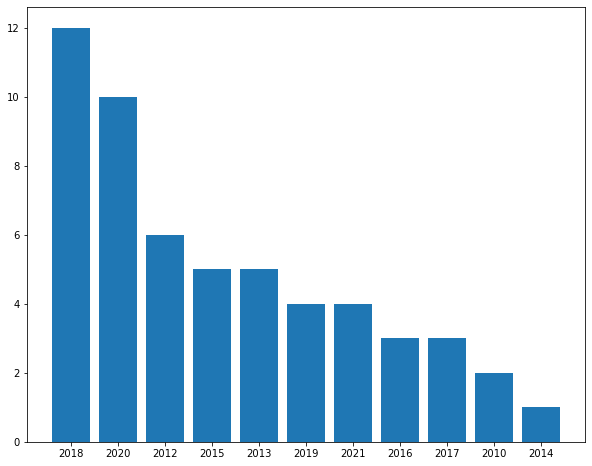

In [10]:
#Grafico para las publicaciones por cada año para la disciplina de estadística
countanios = df2['Año'].value_counts()
# Obtener las etiquetas (años) y los valores (cantidades) de la serie de conteos
etiquetas = countanios.index 
valores = countanios.values

# Crear una figura de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras
plt.bar(etiquetas, valores)

# Rotar las etiquetas del eje x a vertical
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

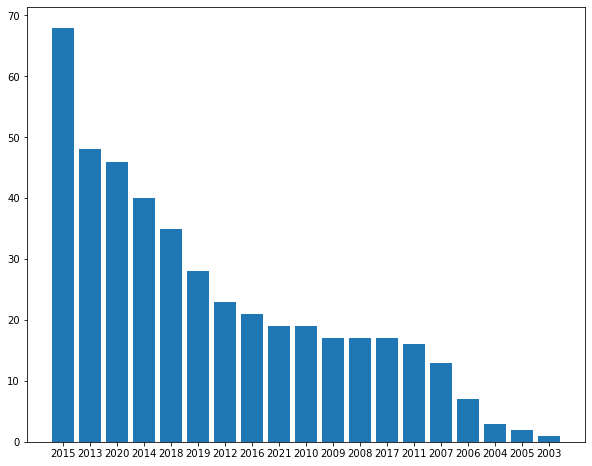

In [11]:
#Grafico para las publicaciones por cada año para las disciplina relacionadas a la estadística
countanios = df3['Año'].value_counts()
# Obtener las etiquetas (años) y los valores (cantidades) de la serie de conteos
etiquetas = countanios.index 
valores = countanios.values

# Crear una figura de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras
plt.bar(etiquetas, valores)

# Rotar las etiquetas del eje x a vertical
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

In [12]:
#Medidas descriptivas estadìsticas para el caso de publicaciones de la disciplina de estadìstica
m3.describe()


,Título
count,11.000000
mean,5.000000
std,3.316625
min,1.000000
25%,3.000000
50%,4.000000
75%,5.500000
max,12.000000


In [13]:
#Medidas descriptivas estadìsticas para el caso de publicaciones relacionadas a la disciplina de estadìstica
m4.describe()

,Título
count,19.000000
mean,23.157895
std,17.496867
min,1.000000
25%,14.500000
50%,19.000000
75%,31.500000
max,68.000000


In [14]:
#Frecuencia para grados de tesis, para el caso solamente de la disciplina de estadística
m5 = df2[["Título","Grado"]].groupby(["Grado"]).count()
m5

,Título
Grado,
Bachillerato,1
Maestría,54


In [15]:
#Frecuencia para grados de tesis, para el caso de las disciplinas relacionadas a la carrera de estadística
m6 = df3[["Título","Grado"]].groupby(["Grado"]).count()
m6

,Título
Grado,
Bachillerato,27
Maestría,57
Título Profesional,356
